In [1]:
import pandas as pd
import ast
import spacy
import re

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load triplets dataframe 
triplets_df_nostop= pd.read_csv(r'C:\Users\Student\Desktop\Thesis-Coding\triplets_dataframe_clean.csv')

def convert_to_list(column):
    return column.apply(ast.literal_eval)

triplets_df_nostop['Content'] = convert_to_list(triplets_df_nostop['Content'])
triplets_df_nostop['triplets_list'] = convert_to_list(triplets_df_nostop['triplets_list'])

In [4]:
triplets_df_nostop

,Title,Articles,Content,coreference_list_ready,Cleaned_Content_new,triplets_list,empty_list,many_triplets,head,relation,tail,is_stopword
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,[\nThis Regulation lays down the rules for the...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[this regulation, lay, the rules for the estab...",False,False,this regulation,lay,the rules for the establishment and the implem...,False
1,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,"[applicant, mean, a natural person or an entit...",False,True,applicant,mean,a natural person or an entity with or without ...,False
2,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,application document means a tender a request ...,application document means a tender a request ...,"[application document, mean, a tender a reques...",False,False,application document,mean,a tender a request to participate a grant appl...,False
3,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,award procedure means a procurement procedure ...,award procedure means a procurement procedure ...,"[award procedure, mean, a procurement procedur...",False,False,award procedure,mean,a procurement procedure a grant award procedur...,False
4,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,basic act means a legal act other than a recom...,basic act means a legal act other than a recom...,"[basic act, mean, a legal act other than a rec...",False,True,basic act,mean,a legal act other than a recommendation or an ...,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4084,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,[ \nThis Regulation shall enter into force on ...,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,[(17) (18) (22) and (23) article 272(26)(d) ar...,False,True,(17) (18) (22) and (23) article 272(26)(d) art...,article,212 and 213 article 214(2),False
4085,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,[ \nThis Regulation shall enter into force on ...,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,[(17) (18) (22) and (23) article 272(26)(d) ar...,False,True,(17) (18) (22) and (23) article 272(26)(d) art...,article,218 219 and 220,False
4086,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,[ \nThis Regulation shall enter into force on ...,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,[(17) (18) (22) and (23) article 272(26)(d) ar...,False,True,(17) (18) (22) and (23) article 272(26)(d) art...,shall apply,the information on the annual average of fullt...,False
4087,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,[ \nThis Regulation shall enter into force on ...,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,[the information on the estimated amount of as...,False,True,the information on the estimated amount of ass...,be provide,for the first time together with the draft bud...,False


In [5]:
triplets_df_nostop.head()

,Title,Articles,Content,coreference_list_ready,Cleaned_Content_new,triplets_list,empty_list,many_triplets,head,relation,tail,is_stopword
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,[\nThis Regulation lays down the rules for the...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[this regulation, lay, the rules for the estab...",False,False,this regulation,lay,the rules for the establishment and the implem...,False
1,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,"[applicant, mean, a natural person or an entit...",False,True,applicant,mean,a natural person or an entity with or without ...,False
2,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,application document means a tender a request ...,application document means a tender a request ...,"[application document, mean, a tender a reques...",False,False,application document,mean,a tender a request to participate a grant appl...,False
3,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,award procedure means a procurement procedure ...,award procedure means a procurement procedure ...,"[award procedure, mean, a procurement procedur...",False,False,award procedure,mean,a procurement procedure a grant award procedur...,False
4,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,basic act means a legal act other than a recom...,basic act means a legal act other than a recom...,"[basic act, mean, a legal act other than a rec...",False,True,basic act,mean,a legal act other than a recommendation or an ...,False


In [6]:
triplets_df_nostop['Title'].unique()

array(['TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES ',
       'TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ',
       'TITLE III \nESTABLISHMENT AND STRUCTURE OF THE BUDGET ',
       'TITLE IV \nBUDGET IMPLEMENTATION ', 'TITLE V \nCOMMON RULES ',
       'TITLE VI \nINDIRECT MANAGEMENT ',
       'TITLE VII \nPROCUREMENT AND CONCESSIONS ', 'TITLE VIII \nGRANTS ',
       'TITLE IX \nPRIZES ',
       'TITLE X \nFINANCIAL INSTRUMENTS, BUDGETARY GUARANTEES AND FINANCIAL ASSISTANCE ',
       'TITLE XI \nCONTRIBUTIONS TO EUROPEAN POLITICAL PARTIES ',
       'TITLE XII \nOTHER BUDGET IMPLEMENTATION INSTRUMENTS ',
       'TITLE XIII \nANNUAL ACCOUNTS AND OTHER FINANCIAL REPORTING ',
       'TITLE XIV \nEXTERNAL AUDIT AND DISCHARGE ',
       'TITLE XV \nADMINISTRATIVE APPROPRIATIONS ',
       'TITLE XVI \nINFORMATION REQUESTS AND DELEGATED ACTS '],
      dtype=object)

In [7]:
triplets_df_nostop[triplets_df_nostop["Title"]=='TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ']["head"].unique()

array(['the budget', 'the common foreign and security policy (cfsp)',
       'the appropriations authorised for the financial year',
       'commitment appropriations', 'payment appropriations',
       'paragraphs 2 and 3 of this article', 'appropriations',
       'budgetary commitments', 'all revenue and expenditure',
       'no expenditure', 'an appropriation',
       'interest generated by prefinancing payments made from the budget',
       'the appropriations entered in the budget',
       'the revenue of a financial year',
       'the own resources for the month of january of the following financial year may be made available in advance pursuant to regulation (eu euratom) no 6092014',
       'the entries in respect of the value added tax (vat) and',
       'commitments', 'the global budgetary commitments', 'payments',
       'the expenditure of the european agricultural guarantee fund (eagf)',
       'the payment order', 'the following expenditure',
       'routine administrative 

# Filter Relations

In [8]:
triplets_df_nostop[triplets_df_nostop["Title"]=='TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ']["relation"].unique()

array(['implement', 'set', 'authorise', 'be charge', 'shall contain',
       'shall consist', 'shall cover', 'prevent', 'be commit', 'be make',
       'provide', 'be book', 'be enter', 'be', 'be authorise',
       'be adjust', 'refer', 'have reach', 'adopt', 'be approve',
       'be lay', 'be carry', 'be complete', 'have adopt', 'use', 'exceed',
       'be return', 'shall take', 'shall inform', 'state', 'be apply',
       'carry', 'commit', 'annex', 'be pay', 'cancel', 'be decommitte',
       'correspond', 'apply', 'shall examine', 'shall decide', 'belong',
       'require', 'may authorise', 'shall', 'shall enter', 'take',
       'shall submit', 'inform', 'wish', 'be give', 'shall act',
       'be exceed', 'raise', 'be draw', 'be present', 'account',
       'be establish', 'avoid', 'be calculate', 'be use',
       'shall constitute', 'participate', 'receive', 'transfer',
       'may assign', 'specify', 'shall include', 'indicate',
       'shall comprise', 'may receive', 'be show', 'be 

In [9]:
def keep_sec_word(relation):
    if ' ' in relation:
        return relation.split(' ')[1].strip()
    else:
        return relation 
    
triplets_df_nostop['relation'] = triplets_df_nostop['relation'].apply(keep_sec_word)

In [10]:
triplets_df_nostop[triplets_df_nostop["Title"]=='TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ']["relation"].unique()

array(['implement', 'set', 'authorise', 'charge', 'contain', 'consist',
       'cover', 'prevent', 'commit', 'make', 'provide', 'book', 'enter',
       'be', 'adjust', 'refer', 'reach', 'adopt', 'approve', 'lay',
       'carry', 'complete', 'use', 'exceed', 'return', 'take', 'inform',
       'state', 'apply', 'annex', 'pay', 'cancel', 'decommitte',
       'correspond', 'examine', 'decide', 'belong', 'require', 'shall',
       'submit', 'wish', 'give', 'act', 'raise', 'draw', 'present',
       'account', 'establish', 'avoid', 'calculate', 'constitute',
       'participate', 'receive', 'transfer', 'assign', 'specify',
       'include', 'indicate', 'comprise', 'show', 'save', 'express',
       'estimate', 'send', 'base', 'accommodate', 'monitor', 'accept',
       'concern', 'explain', 'mean', 'support', 'finance', 'limited',
       'list', 'treat', 'earmark', 'subdivide', 'accompany', 'propose',
       'may', 'deliberate', 'intend', 'consider', 'refrain', 'reduce',
       'represent', 'am

In [201]:
# Use Word Embedings to find synomys of the most frequent relations and replace them with the most frequent relation
# save into a new column 

# Filter Heads

## Keep heads that contain nouns

In [11]:
triplets_df_nostop.shape

(4089, 12)

In [12]:
# Remove stopwords, punctuation from heads 
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.get_pipe("lemmatizer")


stop_words = spacy.lang.en.stop_words.STOP_WORDS 
stopwords = list(stop_words)
punctuation = '!@#$%^&*_-+={}[];"\'|<>,?/~`’‘()'



def lemmatize(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

def tokens(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        tokens.append(token)
    return tokens

def remove_punct(text):
    tokens_list = tokens(text)
    new_list = []
    for token in tokens_list:
        new_token = ""
        for letter in token.text:
            if letter not in punctuation:
                new_token = new_token + letter
        new_list.append(new_token)
    return new_list

def remove_punct_text(text):
    tokens_list = tokens(text)
    new_list = []
    for token in tokens_list:
        new_token = ""
        for letter in token.text:
            if letter not in punctuation:
                new_token = new_token + letter
        new_list.append(new_token)
    return " ".join(new_list)

def remove_stopwords(text):
    text_tokens = remove_punct(text)
    new_text = " "
    for token in text_tokens:
        if token not in stopwords:
               new_text = new_text + ' ' + str(token)
    return lemmatize(new_text).strip()



# def remove_stopwords(text):
#     text_tokens = tokens(text)
#     new_text = " "
#     for token in text_tokens:
#         for i in token.text:
#             if i in punctuation:
#                 token.text = token.text.replace(i,"")
#         if token.text not in stopwords:
#                new_text = new_text + ' ' + str(token.text)
#     return lemmatize(new_text).strip()
        





In [13]:
tokens('the total cost of the legal commitments entered into during the financial year subject to article 114(2')

[the,
 total,
 cost,
 of,
 the,
 legal,
 commitments,
 entered,
 into,
 during,
 the,
 financial,
 year,
 subject,
 to,
 article,
 114(2]

In [130]:
remove_punct_text('the total cost of the legal commitments entered into during the financial year subject to article 114(2')

'the total cost of the legal commitments entered into during the financial year subject to article 1142'

In [127]:
remove_stopwords('the total cost of the legal commitments entered into during the financial year subject to article 114(2')

'total cost legal commitment enter financial year subject article 1142'

In [128]:
remove_stopwords('treatment external assigned revenue referred point paragraph 4 article resulting participation european free trade association ( efta ) states certain union programmes accordance point article 21(2 )')


'treatment external assign revenue refer point paragraph 4 article result participation european free trade association   efta   state certain union programme accordance point article 212'

In [131]:
# triplets_df_nostop['head_nopunct'] = triplets_df_nostop['head'].apply(remove_punct_text)

In [14]:
triplets_df_nostop['head_nostop'] = triplets_df_nostop['head'].apply(remove_stopwords)

In [15]:
# Keep Heads that contain NOUNS 
nlp = spacy.load("en_core_web_sm")

def contains_nouns(text):
    doc = nlp(text)
    k = False
    tags = []
    for token in doc:
        tags.append(spacy.explain(token.pos_))
    if "noun" in tags:
            k=True
    return k


triplets_df_nostop["head_has_noun"] = triplets_df_nostop["head_nostop"].apply(contains_nouns)
triplets_df_nostop = triplets_df_nostop[triplets_df_nostop["head_has_noun"]==True]
triplets_df_nostop.shape


(3635, 14)

## Obtain head noun chunks as column 

In [16]:
# Tokenize

nlp = spacy.load("en_core_web_sm")

def tokens_len(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        tokens.append(token)
    return len(tokens)

In [17]:
# Get noun chunks
nlp = spacy.load("en_core_web_sm")

def get_noun_chuncks(text_head):
    chunks = []
    doc = nlp(text_head)
    for chunk in doc.noun_chunks:
        chunks.append(chunk.text)
    if len(chunks) != 0:
        return chunks
    else:
        return [text_head]
    

In [18]:
get_noun_chuncks('regulation')

['regulation']

In [19]:
triplets_df_nostop['noun_chunks'] = triplets_df_nostop['head'].apply(get_noun_chuncks)

C:\Users\Student\AppData\Local\Temp\ipykernel_11676\2985459439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triplets_df_nostop['noun_chunks'] = triplets_df_nostop['head'].apply(get_noun_chuncks)


In [20]:
list(triplets_df_nostop['noun_chunks'])

[['this regulation'],
 ['applicant'],
 ['application document'],
 ['award procedure'],
 ['basic act'],
 ['beneficiary'],
 ['a grant agreement'],
 ['blending facility', 'platform'],
 ['a cooperation framework',
  'the commission',
  'devel\xadopment',
  'other public finance institutions',
  'a view',
  'nonrepayable forms',
  'support andor financial instruments'],
 ['budget implementation'],
 ['budgetary commitment'],
 ['budgetary guarantee'],
 ['building contract'],
 ['land buildings', 'other immovable property'],
 ['the candidate'],
 ['land buildings', 'other immovable property'],
 ['candidate'],
 ['central purchasing body'],
 ['concession contract'],
 ['a contract', 'pecuniary interest'],
 ['the remuneration'],
 ['the award', 'the concession contract'],
 ['the concessionaire'],
 ['contingent liability'],
 ['contract'],
 ['contractor'],
 ['a public contract'],
 ['contribution agreement'],
 ['an agreement'],
 ['control'],
 ['controls'],
 ['counterpart'],
 ['crisis'],
 ['decommitment'

In [21]:
triplets_df_nostop

,Title,Articles,Content,coreference_list_ready,Cleaned_Content_new,triplets_list,empty_list,many_triplets,head,relation,tail,is_stopword,head_nostop,head_has_noun,noun_chunks
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,[\nThis Regulation lays down the rules for the...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[this regulation, lay, the rules for the estab...",False,False,this regulation,lay,the rules for the establishment and the implem...,False,regulation,True,[this regulation]
1,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,"[applicant, mean, a natural person or an entit...",False,True,applicant,mean,a natural person or an entity with or without ...,False,applicant,True,[applicant]
2,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,application document means a tender a request ...,application document means a tender a request ...,"[application document, mean, a tender a reques...",False,False,application document,mean,a tender a request to participate a grant appl...,False,application document,True,[application document]
3,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,award procedure means a procurement procedure ...,award procedure means a procurement procedure ...,"[award procedure, mean, a procurement procedur...",False,False,award procedure,mean,a procurement procedure a grant award procedur...,False,award procedure,True,[award procedure]
4,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,basic act means a legal act other than a recom...,basic act means a legal act other than a recom...,"[basic act, mean, a legal act other than a rec...",False,True,basic act,mean,a legal act other than a recommendation or an ...,False,basic act,True,[basic act]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,[ \nThis Regulation shall enter into force on ...,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,[(17) (18) (22) and (23) article 272(26)(d) ar...,False,True,(17) (18) (22) and (23) article 272(26)(d) art...,article,212 and 213 article 214(2),False,17 18 22 23 article 27226d articl...,True,"[272(26)(d, article]"
4085,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,[ \nThis Regulation shall enter into force on ...,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,[(17) (18) (22) and (23) article 272(26)(d) ar...,False,True,(17) (18) (22) and (23) article 272(26)(d) art...,article,218 219 and 220,False,17 18 22 23 article 27226d articl...,True,"[272(26)(d, article]"
4086,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,[ \nThis Regulation shall enter into force on ...,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,[(17) (18) (22) and (23) article 272(26)(d) ar...,False,True,(17) (18) (22) and (23) article 272(26)(d) art...,apply,the information on the annual average of fullt...,False,17 18 22 23 article 27226d articl...,True,"[272(26)(d, article]"
4087,TITLE XVI \nINFORMATION REQUESTS AND DELEGATED...,Article 282 Entry into force and application,[ \nThis Regulation shall enter into force on ...,by way of derogation from paragraph 2 of this ...,by way of derogation from paragraph 2 of this ...,[the information on the estimated amount of as...,False,True,the information on the estimated am

## Corpus - Document Term Matrix 

In [22]:
noun_chunks = list(triplets_df_nostop[triplets_df_nostop["Title"]=='TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ']['noun_chunks'])
print(noun_chunks)

[['the budget'], ['the budget'], ['the budget'], ['the common foreign and security policy', 'cfsp'], ['the budget'], ['the appropriations', 'the financial year'], ['commitment appropriations'], ['payment appropriations'], ['this article'], ['appropriations'], ['budgetary commitments'], ['budgetary commitments'], ['all revenue', 'expenditure'], ['no expenditure'], ['no expenditure'], ['an appropriation'], ['an appropriation'], ['interest', 'payments', 'the budget'], ['the appropriations', 'the budget'], ['the revenue', 'a financial year'], ['the own resources', 'the month', 'january', 'the following financial year', 'advance', 'regulation', 'eu euratom'], ['the entries', 'respect', 'the value added tax', '(vat'], ['commitments'], ['the global budgetary commitments'], ['payments'], ['the expenditure', 'the european agricultural guarantee fund', 'eagf'], ['the payment order'], ['the expenditure', 'the european agricultural guarantee fund', 'eagf'], ['the appropriations', 'the budget'], ['

In [23]:
triplets_df_nostop[triplets_df_nostop["Title"]=='TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ']["head"].unique()

array(['the budget', 'the common foreign and security policy (cfsp)',
       'the appropriations authorised for the financial year',
       'commitment appropriations', 'payment appropriations',
       'paragraphs 2 and 3 of this article', 'appropriations',
       'budgetary commitments', 'all revenue and expenditure',
       'no expenditure', 'an appropriation',
       'interest generated by prefinancing payments made from the budget',
       'the appropriations entered in the budget',
       'the revenue of a financial year',
       'the own resources for the month of january of the following financial year may be made available in advance pursuant to regulation (eu euratom) no 6092014',
       'the entries in respect of the value added tax (vat) and',
       'commitments', 'the global budgetary commitments', 'payments',
       'the expenditure of the european agricultural guarantee fund (eagf)',
       'the payment order', 'the following expenditure',
       'routine administrative 

In [24]:
head_nostop_corpus = list(triplets_df_nostop[triplets_df_nostop["Title"]=='TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ']["head_nostop"].unique())
print(head_nostop_corpus)

['budget', 'common foreign security policy   cfsp', 'appropriation authorise financial year', 'commitment appropriation', 'payment appropriation', 'paragraph 2 3 article', 'appropriation', 'budgetary commitment', 'revenue expenditure', 'expenditure', 'interest generate prefinance payment budget', 'appropriation enter budget', 'revenue financial year', 'resource month january follow financial year available advance pursuant regulation   eu euratom   6092014', 'entry respect value add tax   vat', 'commitment', 'global budgetary commitment', 'payment', 'expenditure european agricultural guarantee fund   eagf', 'payment order', 'follow expenditure', 'routine administrative expenditure', 'basis expenditure', 'appropriation end financial year enter carry decision take pursuant paragraph 3 follow financial year : commitment appropriation nondifferentiate appropriation preparatory stage commitment procedure complete 31 december financial year', 'preparatory stage commitment procedure', 'legisl

In [25]:
head_corpus = list(triplets_df_nostop[triplets_df_nostop["Title"]=='TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ']["head"].unique())
print(head_corpus)

['the budget', 'the common foreign and security policy (cfsp)', 'the appropriations authorised for the financial year', 'commitment appropriations', 'payment appropriations', 'paragraphs 2 and 3 of this article', 'appropriations', 'budgetary commitments', 'all revenue and expenditure', 'no expenditure', 'an appropriation', 'interest generated by prefinancing payments made from the budget', 'the appropriations entered in the budget', 'the revenue of a financial year', 'the own resources for the month of january of the following financial year may be made available in advance pursuant to regulation (eu euratom) no 6092014', 'the entries in respect of the value added tax (vat) and', 'commitments', 'the global budgetary commitments', 'payments', 'the expenditure of the european agricultural guarantee fund (eagf)', 'the payment order', 'the following expenditure', 'routine administrative expenditure', 'such expenditure', 'the basis for such expenditure', 'appropriations which have not been 

## Count elements of the noun chunks to check which entities appear the most

In [26]:
entities_counter = {}
for chunks_list in noun_chunks:
    for chunk in chunks_list:
        if not chunk in entities_counter:
            entities_counter[chunk] = 0
        entities_counter[chunk] += 1

In [27]:
entities_counter = dict(sorted(entities_counter.items(), key=lambda item: item[1], reverse=True))
print(entities_counter)

{'the budget': 26, 'appropriations': 18, 'the union institution': 18, 'the appropriations': 16, 'the transfer': 15, 'the european parliament': 14, 'which': 12, 'the council': 12, 'the information': 9, 'paragraph': 8, 'such appropriations': 8, 'the first subparagraph': 8, 'the commission': 8, 'commitment appropriations': 7, 'point': 7, 'the following financial year': 6, 'regulation': 6, 'eu': 6, 'accordance': 6, 'the estimates': 6, 'bodies': 6, 'a financial statement': 6, 'the amendment': 6, 'payments': 5, 'the expenditure': 5, 'amounts': 5, 'assigned revenue': 5, 'the financial year': 4, 'the preparatory stages': 4, 'article': 4, 'the union': 4, 'the revenue or payment appropriations': 4, 'revenue': 4, 'services': 4, 'the use': 4, 'union institutions': 4, 'corporate sponsorship': 4, 'transfers': 4, 'the sixweek period': 4, 'activities': 4, 'this article': 3, 'budgetary commitments': 3, 'the revenue': 3, 'commitments': 3, 'they': 3, 'nondifferentiated appropriations': 3, 'the legislativ

In [44]:
# Wordcloud and bar plot of the most frequent noun chunks

## TF-IDF of the Head Corpus

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', smooth_idf=True)
result = tfidf.fit_transform(head_corpus)
print(result.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.48305744]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [29]:
feature_names = tfidf.get_feature_names_out()
df_tfidf = pd.DataFrame(result.toarray(), columns=feature_names)
df_tfidf

,101,12,13032013,191,21,2232014,29,30,31,6092014,...,unionthe,use,used,value,vat,websites,work,works,wrongly,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.483057
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.706807,0.0,0.0,0.0,0.000000
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [30]:
# Sum the TF-IDF scores across all documents for each term
word_scores = df_tfidf.sum(axis=0)

# Sort the words by their scores in descending order
sorted_words = word_scores.sort_values(ascending=False)

# Display the top 10 most important words
print(sorted_words)

appropriations    14.423087
union              8.904469
revenue            8.492072
expenditure        6.853419
budget             5.887023
                    ...    
mission            0.146471
departments        0.146471
supplied           0.146471
supply             0.146471
101                0.146471
Length: 396, dtype: float64


In [31]:
# Get only the idf scores
df_idf = pd.DataFrame({'Feature': feature_names, 'IDF': tfidf.idf_})
df_idf_asc = df_idf.sort_values(by='IDF', ascending=False)
df_idf_asc

,Feature,IDF
0,101,5.615121
173,expiry,5.615121
316,related,5.615121
315,reimbursed,5.615121
314,regulations,5.615121
...,...,...
161,european,3.600217
74,budget,3.417896
335,revenue,3.363829
385,union,3.050171


In [32]:
# Sort the words by their scores in descending order
sorted_words_asc = word_scores.sort_values(ascending=True)

# Display the top 10 most important words

sorted_words_asc = sorted_words_asc.to_frame().reset_index().rename(columns={'index': 'token', 0: 'tf-idf'})
sorted_words_asc

sorted_words_dict_asc = sorted_words_asc.set_index('token')['tf-idf'].to_dict()
print(sorted_words_dict_asc)

{'101': 0.14647092851448362, 'repayment': 0.14647092851448362, 'proceeds': 0.14647092851448362, 'departments': 0.14647092851448362, 'behalf': 0.14647092851448362, 'mission': 0.14647092851448362, 'request': 0.14647092851448362, 'supply': 0.14647092851448362, 'insurance': 0.14647092851448362, 'wrongly': 0.14647092851448362, 'supplied': 0.14647092851448362, 'allowances': 0.14647092851448362, 'works': 0.14647092851448362, 'analyse': 0.18282536252278475, 'related': 0.18282536252278475, 'addressed': 0.18282536252278475, 'preparation': 0.18282536252278475, 'expected': 0.18282536252278475, 'options': 0.18282536252278475, 'based': 0.18282536252278475, 'different': 0.18282536252278475, 'identify': 0.18282536252278475, 'evidence': 0.18282536252278475, 'issues': 0.18282536252278475, 'effects': 0.18282536252278475, 'strategy': 0.18304250255735652, 'accessibility': 0.18304250255735652, 'controls': 0.18304250255735652, 'results': 0.18304250255735652, 'risk': 0.18304250255735652, 'coordinated': 0.1830

In [33]:
sorted_words = sorted_words.to_frame().reset_index().rename(columns={'index': 'token', 0: 'tf-idf'})
sorted_words

,token,tf-idf
0,appropriations,14.423087
1,union,8.904469
2,revenue,8.492072
3,expenditure,6.853419
4,budget,5.887023
...,...,...
391,mission,0.146471
392,departments,0.146471
393,supplied,0.146471
394,supply,0.146471


In [34]:
sorted_words_dict = sorted_words.set_index('token')['tf-idf'].to_dict()

In [35]:
print(sorted_words_dict)

{'appropriations': 14.423086512835102, 'union': 8.904469439422869, 'revenue': 8.49207243137076, 'expenditure': 6.853418591632436, 'budget': 5.887022575761518, 'payment': 5.5852538586719, 'european': 5.484399116390689, 'institution': 5.100815597296911, 'commitment': 4.913280644117876, 'parliament': 4.908118204671905, 'financial': 4.579505709166083, 'information': 4.180927734638591, 'institutions': 4.078636287005658, 'year': 3.9911984732006505, 'following': 3.9523565454263787, 'commitments': 3.882252735963215, 'council': 3.804859512063802, 'paragraph': 3.594344878504034, 'referred': 3.428522720308242, 'subparagraph': 3.372312952829158, 'concerned': 3.3030252281916357, 'transfers': 3.2069740139234, 'article': 3.0436095899716737, 'corresponding': 3.040183222432416, 'transfer': 2.7972990449955293, 'payments': 2.781988243280253, 'bodies': 2.710843009597638, 'assigned': 2.7029924358306703, 'commission': 2.698168323547911, 'objectives': 2.5629990790122124, 'provided': 2.365561474860028, 'adjus

In [36]:
len(sorted_words_dict)

396

In [54]:
# Wordcloud and bar plot of the most important words


## LDA of the triplets to Identify Topics per Title

In [123]:
#!pip install gensim
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim



In [124]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel

In [125]:
triplets_df_nostop.head()

,Title,Articles,Content,coreference_list_ready,Cleaned_Content_new,triplets_list,empty_list,many_triplets,head,relation,tail,is_stopword,head_nostop,head_has_noun,noun_chunks
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,[\nThis Regulation lays down the rules for the...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[this regulation, lay, the rules for the estab...",False,False,this regulation,lay,the rules for the establishment and the implem...,False,regulation,True,[regulation]
1,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,"[applicant, mean, a natural person or an entit...",False,True,applicant,mean,a natural person or an entity with or without ...,False,applicant,True,[applicant]
2,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,application document means a tender a request ...,application document means a tender a request ...,"[application document, mean, a tender a reques...",False,False,application document,mean,a tender a request to participate a grant appl...,False,application document,True,[application document]
3,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,award procedure means a procurement procedure ...,award procedure means a procurement procedure ...,"[award procedure, mean, a procurement procedur...",False,False,award procedure,mean,a procurement procedure a grant award procedur...,False,award procedure,True,[award procedure]
4,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,basic act means a legal act other than a recom...,basic act means a legal act other than a recom...,"[basic act, mean, a legal act other than a rec...",False,True,basic act,mean,a legal act other than a recommendation or an ...,False,basic act,True,[basic act]


In [126]:
triplets_df_nostop['Title'].unique()

array(['TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES ',
       'TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ',
       'TITLE III \nESTABLISHMENT AND STRUCTURE OF THE BUDGET ',
       'TITLE IV \nBUDGET IMPLEMENTATION ', 'TITLE V \nCOMMON RULES ',
       'TITLE VI \nINDIRECT MANAGEMENT ',
       'TITLE VII \nPROCUREMENT AND CONCESSIONS ', 'TITLE VIII \nGRANTS ',
       'TITLE IX \nPRIZES ',
       'TITLE X \nFINANCIAL INSTRUMENTS, BUDGETARY GUARANTEES AND FINANCIAL ASSISTANCE ',
       'TITLE XI \nCONTRIBUTIONS TO EUROPEAN POLITICAL PARTIES ',
       'TITLE XII \nOTHER BUDGET IMPLEMENTATION INSTRUMENTS ',
       'TITLE XIII \nANNUAL ACCOUNTS AND OTHER FINANCIAL REPORTING ',
       'TITLE XIV \nEXTERNAL AUDIT AND DISCHARGE ',
       'TITLE XV \nADMINISTRATIVE APPROPRIATIONS ',
       'TITLE XVI \nINFORMATION REQUESTS AND DELEGATED ACTS '],
      dtype=object)

In [155]:
# For a specific Title
triplets_corpus = []
for triple in list(triplets_df_nostop[triplets_df_nostop['Title']=='TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ']['triplets_list']):
    triple_text = " ".join(triple)
    triplets_corpus.append(triple_text)


In [156]:
print(triplets_corpus)

['the budget implement sound financial management and transparency in accordance with the principles of unity budgetary accuracy annuality equilibrium unit of account universality specification', 'the budget set  in this regulation', 'the budget authorise all revenue and expenditure considered necessary for the union', 'the common foreign and security policy (cfsp) be charge the revenue and expenditure of the european atomic energy community where to the budget', 'the budget shall contain differentiated appropriations which consist of commitment appropriations and payment appropriations and', ' the appropriations authorised for the financial year shall consist  of: appropriations provided in the budget including by amending budgets appropriations carried over from preceding financial years appropriations made available again in accordance with article 15 appropriations arising from prefinancing payments which have been repaid in accordance with point of article 12(4) appropriations pro

In [159]:
# # Remove stopwords, punctuation from heads and apply stemming to remove plural s from words 
# nlp = spacy.load("en_core_web_sm")
# lemmatizer = nlp.get_pipe("lemmatizer")


# stop_words = spacy.lang.en.stop_words.STOP_WORDS 
# stopwords = list(stop_words)
# punctuation = '!@#$%^&*_-+={}[];"\'|<>,?/~`’‘()'



# def lemmatize(text):
#     doc = nlp(text)
#     return " ".join([token.lemma_ for token in doc])

# def tokens(text):
#     doc = nlp(text)
#     tokens = []
#     for token in doc:
#          if token.text.strip():
#             tokens.append(token)
#     return tokens

# def remove_stopwords(text):
#     text_tokens = tokens(text)
#     new_text = " "
#     for token in text_tokens:
#         if token.text not in stopwords and token.text not in punctuation:
#             new_text = new_text + ' ' + str(token.text)
#     return lemmatize(new_text).strip()


In [160]:
triplets_corpus_cleaned = []
for triple in triplets_corpus:
    triplets_corpus_cleaned.append(remove_stopwords(triple))
    


In [163]:
triplets_corpus_cleaned_tokens = []
for triple_text in triplets_corpus_cleaned:
    triplets_corpus_cleaned_tokens.append(tokens(triple_text))


triplets_corpus_cleaned_tokens = [[str(token) for token in doc] for doc in triplets_corpus_cleaned_tokens if doc]
    

In [164]:
triplets_corpus_cleaned_tokens

[['budget',
  'implement',
  'sound',
  'financial',
  'management',
  'transparency',
  'accordance',
  'principle',
  'unity',
  'budgetary',
  'accuracy',
  'annuality',
  'equilibrium',
  'unit',
  'account',
  'universality',
  'specification'],
 ['budget', 'set', 'regulation'],
 ['budget',
  'authorise',
  'revenue',
  'expenditure',
  'consider',
  'necessary',
  'union'],
 ['common',
  'foreign',
  'security',
  'policy',
  'cfsp',
  'charge',
  'revenue',
  'expenditure',
  'european',
  'atomic',
  'energy',
  'community',
  'budget'],
 ['budget',
  'shall',
  'contain',
  'differentiate',
  'appropriation',
  'consist',
  'commitment',
  'appropriation',
  'payment',
  'appropriation'],
 ['appropriation',
  'authorise',
  'financial',
  'year',
  'shall',
  'consist',
  ':',
  'appropriation',
  'provide',
  'budget',
  'include',
  'amend',
  'budget',
  'appropriation',
  'carry',
  'precede',
  'financial',
  'year',
  'appropriation',
  'available',
  'accordance',
  'ar

In [165]:

id2word = corpora.Dictionary(triplets_corpus_cleaned_tokens)

In [166]:
corpus = [id2word.doc2bow(text) for text in triplets_corpus_cleaned_tokens]

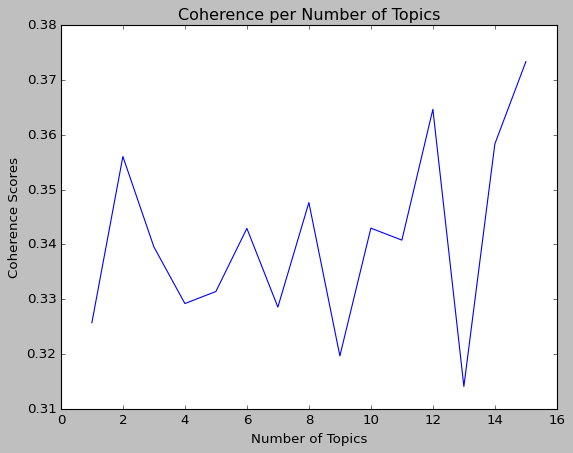

In [186]:
# Decide on number of topics based on coherence score

number_of_topics = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
coherence_scores = []


for k in number_of_topics:
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=k, random_state=42, alpha='auto')
    coherence_model_lda = CoherenceModel(model=lda_model, texts=triplets_corpus_cleaned_tokens, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)

plt.style.use('classic')
fig, ax = plt.subplots()


ax.plot(number_of_topics, coherence_scores)

# ax.invert_yaxis()
ax.set_ylabel('Coherence Scores')
ax.set_xlabel('Number of Topics')
ax.set_title('Coherence per Number of Topics')

# plt.tight_layout()
# ax.tick_params(axis='y', labelsize=8)

plt.show()

In [197]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=max(coherence_scores), random_state=42, alpha='auto')

pd.DataFrame(
    {
        f"Topic {n}": [w for (w, tw) in words]
        for (n, words) in lda_model.show_topics(num_topics=15, formatted=False)
    }
)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14
0,appropriation,union,european,appropriation,revenue,refer,institution,appropriation,article,transfer,year,european,union,financial,appropriation
1,year,institution,payment,financial,internal,union,union,financial,refer,appropriation,financial,parliament,article,year,budget
2,transfer,shall,parliament,commitment,assign,article,paragraph,year,budget,union,appropriation,follow,appropriation,appropriation,financial
3,financial,expenditure,decision,budget,estimate,appropriation,follow,eu,paragraph,shall,payment,council,budget,council,revenue
4,budget,appropriation,euro,eu,procedure,institution,concern,follow,point,budget,31,approve,revenue,expenditure,control
5,shall,article,30,year,control,paragraph,year,regulation,case,institution,follow,financial,financial,current,year
6,commit,european,day,follow,shall,commitment,refer,refer,appropriation,article,shall,period,point,european,carry
7,union,commitment,account,revenue,article,point,budget,article,4,paragraph,european,year,shall,parliament,assign
8,institution,concern,authorisation,article,institution,sponsor,financial,commitment,provide,refer,commission,shall,subparagraph,yearthe,follow
9,regard,correspond,conversion,take,include,revenue,transfer,budget,1,title,enter,transfer,action,total,provide


In [188]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [189]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)

## Idea: Word Embeddings to group similar heads together under the same name 

In [ ]:
# Get Embeddings for its head
# Create clusters of heads based on kmeans or hierarchical clustering
# Visualize using t-SNE 
# Assign labels to clusters and replace instances of the clusters in heads with the label to limit the number of heads

# Filter Tails

In [37]:
triplets_df_nostop.head()

,Title,Articles,Content,coreference_list_ready,Cleaned_Content_new,triplets_list,empty_list,many_triplets,head,relation,tail,is_stopword,head_nostop,head_has_noun,noun_chunks
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,[\nThis Regulation lays down the rules for the...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[this regulation, lay, the rules for the estab...",False,False,this regulation,lay,the rules for the establishment and the implem...,False,regulation,True,[this regulation]
1,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,"[applicant, mean, a natural person or an entit...",False,True,applicant,mean,a natural person or an entity with or without ...,False,applicant,True,[applicant]
2,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,application document means a tender a request ...,application document means a tender a request ...,"[application document, mean, a tender a reques...",False,False,application document,mean,a tender a request to participate a grant appl...,False,application document,True,[application document]
3,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,award procedure means a procurement procedure ...,award procedure means a procurement procedure ...,"[award procedure, mean, a procurement procedur...",False,False,award procedure,mean,a procurement procedure a grant award procedur...,False,award procedure,True,[award procedure]
4,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,basic act means a legal act other than a recom...,basic act means a legal act other than a recom...,"[basic act, mean, a legal act other than a rec...",False,True,basic act,mean,a legal act other than a recommendation or an ...,False,basic act,True,[basic act]


In [38]:
triplets_df_nostop["Title"].unique()

array(['TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES ',
       'TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ',
       'TITLE III \nESTABLISHMENT AND STRUCTURE OF THE BUDGET ',
       'TITLE IV \nBUDGET IMPLEMENTATION ', 'TITLE V \nCOMMON RULES ',
       'TITLE VI \nINDIRECT MANAGEMENT ',
       'TITLE VII \nPROCUREMENT AND CONCESSIONS ', 'TITLE VIII \nGRANTS ',
       'TITLE IX \nPRIZES ',
       'TITLE X \nFINANCIAL INSTRUMENTS, BUDGETARY GUARANTEES AND FINANCIAL ASSISTANCE ',
       'TITLE XI \nCONTRIBUTIONS TO EUROPEAN POLITICAL PARTIES ',
       'TITLE XII \nOTHER BUDGET IMPLEMENTATION INSTRUMENTS ',
       'TITLE XIII \nANNUAL ACCOUNTS AND OTHER FINANCIAL REPORTING ',
       'TITLE XIV \nEXTERNAL AUDIT AND DISCHARGE ',
       'TITLE XV \nADMINISTRATIVE APPROPRIATIONS ',
       'TITLE XVI \nINFORMATION REQUESTS AND DELEGATED ACTS '],
      dtype=object)

In [39]:
triplets_df_nostop[triplets_df_nostop["Title"]=="TITLE II \nBUDGET AND BUDGETARY PRINCIPLES "].head()

,Title,Articles,Content,coreference_list_ready,Cleaned_Content_new,triplets_list,empty_list,many_triplets,head,relation,tail,is_stopword,head_nostop,head_has_noun,noun_chunks
118,TITLE II \nBUDGET AND BUDGETARY PRINCIPLES,Article 6 Respect for budgetary principles,[\nThe budget shall be established and impleme...,the budget shall be established and implemente...,the budget shall be established and implemente...,"[the budget, implement, sound financial manage...",False,True,the budget,implement,sound financial management and transparency in...,False,budget,True,[the budget]
119,TITLE II \nBUDGET AND BUDGETARY PRINCIPLES,Article 6 Respect for budgetary principles,[\nThe budget shall be established and impleme...,the budget shall be established and implemente...,the budget shall be established and implemente...,"[the budget, set, in this regulation]",False,True,the budget,set,in this regulation,False,budget,True,[the budget]
120,TITLE II \nBUDGET AND BUDGETARY PRINCIPLES,Article 7 Scope of the budget,"[ \nFor each financial year, the budget shall ...",for each financial year the budget shall forec...,for each financial year the budget shall forec...,"[the budget, authorise, all revenue and expend...",False,False,the budget,authorise,all revenue and expenditure considered necessa...,False,budget,True,[the budget]
121,TITLE II \nBUDGET AND BUDGETARY PRINCIPLES,Article 7 Scope of the budget,"[ \nFor each financial year, the budget shall ...",for each financial year the budget shall forec...,it shall comprise: the revenue and expenditur...,[the common foreign and security policy (cfsp)...,False,False,the common foreign and security policy (cfsp),charge,the revenue and expenditure of the european at...,False,common foreign security policy cfsp,True,"[the common foreign and security policy, cfsp]"
122,TITLE II \nBUDGET AND BUDGETARY PRINCIPLES,Article 7 Scope of the budget,"[ \nFor each financial year, the budget shall ...",the budget shall contain differentiated approp...,the budget shall contain differentiated approp...,"[the budget, shall contain, differentiated app...",False,True,the budget,contain,differentiated appropriations which consist of...,False,budget,True,[the budget]


In [40]:
triplets_df_nostop[triplets_df_nostop["Title"]=="TITLE II \nBUDGET AND BUDGETARY PRINCIPLES "]["head_nostop"].unique()

array(['budget', 'common foreign security policy   cfsp',
       'appropriation authorise financial year',
       'commitment appropriation', 'payment appropriation',
       'paragraph 2 3 article', 'appropriation', 'budgetary commitment',
       'revenue expenditure', 'expenditure',
       'interest generate prefinance payment budget',
       'appropriation enter budget', 'revenue financial year',
       'resource month january follow financial year available advance pursuant regulation   eu euratom   6092014',
       'entry respect value add tax   vat', 'commitment',
       'global budgetary commitment', 'payment',
       'expenditure european agricultural guarantee fund   eagf',
       'payment order', 'follow expenditure',
       'routine administrative expenditure', 'basis expenditure',
       'appropriation end financial year enter carry decision take pursuant paragraph 3 follow financial year : commitment appropriation nondifferentiate appropriation preparatory stage commitment 

In [41]:
# remove stopwords, punctuation and lemmatize
remove_stopwords('sound financial management and transparency in accordance with the principles of unity budgetary accuracy annuality equilibrium unit of account universality specification')

'sound financial management transparency accordance principle unity budgetary accuracy annuality equilibrium unit account universality specification'

In [60]:
contains_nouns('ne twelfth of the appropriations provided for in the same chapter of the budget however')

True

In [61]:
# get noun chunks 
get_noun_chuncks('follow expenditure')

['expenditure']

In [62]:
get_noun_chuncks('commitment appropriation nondifferentiate appropriation')

['commitment appropriation nondifferentiate appropriation']

In [42]:
triplets_df_nostop[triplets_df_nostop["Title"]=="TITLE II \nBUDGET AND BUDGETARY PRINCIPLES "]["noun_chunks"]

118                                       [the budget]
119                                       [the budget]
120                                       [the budget]
121     [the common foreign and security policy, cfsp]
122                                       [the budget]
                            ...                       
483    [the information, the persons entities, bodies]
484                                    [personal data]
485                                  [the information]
486                                        [the funds]
487                              [whose official name]
Name: noun_chunks, Length: 318, dtype: object

## TF-IDF Scores to Filter Noun Chunks of Tails 

In [70]:
# Remove punctuation, stopwords, and lemmatize
# Get tf-idf scores 

In [45]:
tail_subset = triplets_df_nostop[triplets_df_nostop["Title"]=="TITLE II \nBUDGET AND BUDGETARY PRINCIPLES "]
tail_subset.shape

(318, 15)

In [46]:
tail_subset["tail_has_noun"] = tail_subset["tail"].apply(contains_nouns)

C:\Users\Student\AppData\Local\Temp\ipykernel_11676\1940387923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_subset["tail_has_noun"] = tail_subset["tail"].apply(contains_nouns)


In [47]:
tail_subset["tail_has_noun"].sum()

289

In [48]:
tail_subset = tail_subset[tail_subset["tail_has_noun"]==True]

In [49]:
tail_subset.shape

(289, 16)

In [50]:
tail_subset['tail'].unique()

array(['sound financial management and transparency in accordance with the principles of unity budgetary accuracy annuality equilibrium unit of account universality specification',
       'in this regulation',
       'all revenue and expenditure considered necessary for the union',
       'the revenue and expenditure of the european atomic energy community where to the budget',
       'differentiated appropriations which consist of commitment appropriations and payment appropriations and',
       'of: appropriations provided in the budget including by amending budgets appropriations carried over from preceding financial years appropriations made available again in accordance with article 15 appropriations arising from prefinancing payments which have been repaid in accordance with point of article 12(4) appropriations provided following the receipt of revenue assigned during the financial year or carried over from preceding financial years',
       'the total cost of the legal commitme

In [51]:
tail_subset['tail_nostop'] = tail_subset['tail'].apply(remove_stopwords)

In [52]:
tail_subset['tail_nostop']

118    sound financial management transparency accord...
119                                           regulation
120         revenue expenditure consider necessary union
121    revenue expenditure european atomic energy com...
122    differentiate appropriation consist commitment...
                             ...                        
480                                          paragraph 1
481         directly dedicated website union institution
483                                          paragraph 4
485          year end financial year fund legally commit
487                                       natural person
Name: tail_nostop, Length: 289, dtype: object

In [53]:
tail_subset['tail_nostop'].unique()

array(['sound financial management transparency accordance principle unity budgetary accuracy annuality equilibrium unit account universality specification',
       'regulation', 'revenue expenditure consider necessary union',
       'revenue expenditure european atomic energy community budget',
       'differentiate appropriation consist commitment appropriation payment appropriation',
       ': appropriation provide budget include amend budget appropriation carry precede financial year appropriation available accordance article 15 appropriation arise prefinance payment repay accordance point article 124   appropriation provide follow receipt revenue assign financial year carry precede financial year',
       'total cost legal commitment enter financial year subject article 1142',
       'payment honour legal commitment enter financial year',
       'appropriation commit globally budgetary commitment annual instalment respectively provide point subparagraph article 1121',
       'annu

In [54]:
tail_corpus = list(tail_subset['tail'].unique())
print(tail_corpus)

['sound financial management and transparency in accordance with the principles of unity budgetary accuracy annuality equilibrium unit of account universality specification', 'in this regulation', 'all revenue and expenditure considered necessary for the union', 'the revenue and expenditure of the european atomic energy community where to the budget', 'differentiated appropriations which consist of commitment appropriations and payment appropriations and', 'of: appropriations provided in the budget including by amending budgets appropriations carried over from preceding financial years appropriations made available again in accordance with article 15 appropriations arising from prefinancing payments which have been repaid in accordance with point of article 12(4) appropriations provided following the receipt of revenue assigned during the financial year or carried over from preceding financial years', 'the total cost of the legal commitments entered into during the financial year subje

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', smooth_idf=True)
result = tfidf.fit_transform(tail_corpus)
# print(result.toarray())

feature_names = tfidf.get_feature_names_out()
df_tfidf = pd.DataFrame(result.toarray(), columns=feature_names)
# df_tfidf

word_scores = df_tfidf.sum(axis=0)
sorted_words = word_scores.sort_values(ascending=False)
print(sorted_words)

year              13.496798
financial         13.238623
appropriations    12.850598
article           12.038980
budget             9.745710
                    ...    
image              0.100701
accepting          0.100701
treatment          0.100701
generate           0.100701
core               0.100701
Length: 715, dtype: float64


In [75]:
# Sort the words by their scores in descending order
sorted_words_asc = word_scores.sort_values(ascending=False)

# Display the top 10 most important words

sorted_words_asc = sorted_words_asc.to_frame().reset_index().rename(columns={'index': 'token', 0: 'tf-idf'})
sorted_words_asc

sorted_words_dict_asc = sorted_words_asc.set_index('token')['tf-idf'].to_dict()
print(sorted_words_dict_asc)

{'year': 13.496798081539055, 'financial': 13.238622689885554, 'appropriations': 12.850598064070434, 'article': 12.038980033254855, 'budget': 9.745710282720985, 'paragraph': 9.617706254126574, 'following': 8.63754858692425, 'union': 7.485177498061758, 'european': 6.907508851568201, 'point': 6.866996534691095, 'transfer': 6.8228917728378455, 'subparagraph': 6.672116787820079, 'council': 6.640223246733916, 'accordance': 6.322221872445437, 'parliament': 5.744489564925783, 'expenditure': 5.661224595606435, '31': 5.57157649032938, 'revenue': 5.290941645494128, 'payment': 4.776907705570411, 'assigned': 4.542462468274308, 'information': 4.276742153743558, 'regulation': 4.073009075426467, 'provided': 4.04619155852752, 'eu': 4.005728135511474, 'december': 3.97844091424899, 'proposal': 3.924035431265207, 'shall': 3.8025089436832418, 'referred': 3.761359723506887, 'chapter': 3.736601876344608, 'commission': 3.4905507504005486, 'institutions': 3.4253548142986023, 'paragraphs': 3.3372464962416624, '

In [76]:
sorted_words = sorted_words.to_frame().reset_index().rename(columns={'index': 'token', 0: 'tf-idf'})
sorted_words

,token,tf-idf
0,year,13.496798
1,financial,13.238623
2,appropriations,12.850598
3,article,12.038980
4,budget,9.745710
...,...,...
710,image,0.100701
711,accepting,0.100701
712,treatment,0.100701
713,generate,0.100701


In [77]:
tail_subset.head()

,Title,Articles,Content,coreference_list_ready,Cleaned_Content_new,triplets_list,empty_list,many_triplets,head,relation,tail,is_stopword,head_nostop,head_has_noun,noun_chunks,tail_has_noun,tail_nostop
118,TITLE II \nBUDGET AND BUDGETARY PRINCIPLES,Article 6 Respect for budgetary principles,[\nThe budget shall be established and impleme...,the budget shall be established and implemente...,the budget shall be established and implemente...,"[the budget, implement, sound financial manage...",False,True,the budget,implement,sound financial management and transparency in...,False,budget,True,[budget],True,sound financial management transparency accord...
119,TITLE II \nBUDGET AND BUDGETARY PRINCIPLES,Article 6 Respect for budgetary principles,[\nThe budget shall be established and impleme...,the budget shall be established and implemente...,the budget shall be established and implemente...,"[the budget, set, in this regulation]",False,True,the budget,set,in this regulation,False,budget,True,[budget],True,regulation
120,TITLE II \nBUDGET AND BUDGETARY PRINCIPLES,Article 7 Scope of the budget,"[ \nFor each financial year, the budget shall ...",for each financial year the budget shall forec...,for each financial year the budget shall forec...,"[the budget, authorise, all revenue and expend...",False,False,the budget,authorise,all revenue and expenditure considered necessa...,False,budget,True,[budget],True,revenue expenditure consider necessary union
121,TITLE II \nBUDGET AND BUDGETARY PRINCIPLES,Article 7 Scope of the budget,"[ \nFor each financial year, the budget shall ...",for each financial year the budget shall forec...,it shall comprise: the revenue and expenditur...,[the common foreign and security policy (cfsp)...,False,False,the common foreign and security policy (cfsp),charge,the revenue and expenditure of the european at...,False,common foreign security policy cfsp,True,[common foreign security policy cfsp],True,revenue expenditure european atomic energy com...
122,TITLE II \nBUDGET AND BUDGETARY PRINCIPLES,Article 7 Scope of the budget,"[ \nFor each financial year, the budget shall ...",the budget shall contain differentiated approp...,the budget shall contain differentiated approp...,"[the budget, shall contain, differentiated app...",False,True,the budget,contain,differentiated appropriations which consist of...,False,budget,True,[budget],True,differentiate appropriation consist commitment...


In [78]:
tail_subset["tail_noun_chunks"] = tail_subset["tail"].apply(get_noun_chuncks)

In [79]:
tail_subset["tail_noun_chunks_2"] = tail_subset["tail_nostop"].apply(get_noun_chuncks)

In [80]:
for i in list(tail_subset["tail_noun_chunks"]):
    print(i)


['sound financial management', 'transparency', 'accordance', 'the principles', 'unity budgetary accuracy annuality equilibrium unit', 'account universality specification']
['this regulation']
['all revenue', 'expenditure', 'the union']
['the revenue', 'expenditure', 'the european atomic energy community', 'the budget']
['differentiated appropriations', 'which', 'commitment appropriations', 'payment appropriations']
['appropriations', 'the budget', 'budgets appropriations', 'financial years appropriations', 'accordance', 'article 15 appropriations', 'prefinancing payments', 'which', 'accordance', 'point', 'article 12(4) appropriations', 'the receipt', 'revenue', 'the financial year', 'preceding financial years']
['the total cost', 'the legal commitments', 'the financial year', 'article']
['payments', 'the legal commitments', 'the financial year']
['appropriations', 'budgetary commitments', 'annual instalments', 'point', 'the first subparagraph', 'article']
['annual instalments']
['point

In [81]:
for i in list(tail_subset["tail_noun_chunks_2"]):
    print(i)



['sound financial management transparency accordance principle unity budgetary accuracy annuality equilibrium unit account universality specification']
['regulation']
['revenue expenditure', 'necessary union']
['revenue expenditure european atomic energy community budget']
['differentiate appropriation consist commitment appropriation payment appropriation']
['appropriation provide budget', 'amend budget appropriation', 'precede financial year appropriation available accordance article 15 appropriation', 'receipt revenue', 'precede financial year']
['total cost legal commitment', 'financial year subject article']
['payment honour legal commitment']
['appropriation', 'globally budgetary commitment annual instalment', 'point subparagraph article']
['annual instalment']
['subparagraph article']
['budget line']
['prejudice authorise expenditure', 'contingent liability', 'article']
['excess authorise appropriation']
['budget']
['item expenditure']
['union', 'contribution agreement finance a

In [ ]:
# Go through the noun chunks list of each tail and give each noun chunk a score
# The score is the sum of the tf-idf score of each token in the chunk 
# chooce the chunk with the highest score and store into a new column 

In [82]:
sorted_words_dict_asc

{'year': 13.496798081539055,
 'financial': 13.238622689885554,
 'appropriations': 12.850598064070434,
 'article': 12.038980033254855,
 'budget': 9.745710282720985,
 'paragraph': 9.617706254126574,
 'following': 8.63754858692425,
 'union': 7.485177498061758,
 'european': 6.907508851568201,
 'point': 6.866996534691095,
 'transfer': 6.8228917728378455,
 'subparagraph': 6.672116787820079,
 'council': 6.640223246733916,
 'accordance': 6.322221872445437,
 'parliament': 5.744489564925783,
 'expenditure': 5.661224595606435,
 '31': 5.57157649032938,
 'revenue': 5.290941645494128,
 'payment': 4.776907705570411,
 'assigned': 4.542462468274308,
 'information': 4.276742153743558,
 'regulation': 4.073009075426467,
 'provided': 4.04619155852752,
 'eu': 4.005728135511474,
 'december': 3.97844091424899,
 'proposal': 3.924035431265207,
 'shall': 3.8025089436832418,
 'referred': 3.761359723506887,
 'chapter': 3.736601876344608,
 'commission': 3.4905507504005486,
 'institutions': 3.4253548142986023,
 'par

In [102]:
example = list(tail_subset["tail_noun_chunks"])[0]
example

['sound financial management',
 'transparency',
 'accordance',
 'the principles',
 'unity budgetary accuracy annuality equilibrium unit',
 'account universality specification']

In [84]:
sorted_words_dict_asc.keys()

dict_keys(['year', 'financial', 'appropriations', 'article', 'budget', 'paragraph', 'following', 'union', 'european', 'point', 'transfer', 'subparagraph', 'council', 'accordance', 'parliament', 'expenditure', '31', 'revenue', 'payment', 'assigned', 'information', 'regulation', 'provided', 'eu', 'december', 'proposal', 'shall', 'referred', 'chapter', 'commission', 'institutions', 'paragraphs', 'cases', 'management', 'pursuant', 'articles', 'period', 'event', 'internal', 'institution', 'activities', 'items', 'line', 'corresponding', 'commitment', 'carried', 'accounting', 'officer', 'specific', 'total', 'points', 'prejudice', 'transfers', 'programme', 'budgetary', 'january', 'authorised', 'decision', 'appropriate', 'accounts', 'procedures', 'available', 'subject', 'legally', 'commitments', 'current', 'balance', 'principle', 'entered', 'end', 'basic', '21', '30', 'preceding', 'act', 'funds', 'area', 'committed', 'purpose', 'external', 'action', 'twelfth', 'legal', 'regard', 'relevant', 'ba

In [85]:
tokens('sound financial management')

[sound, financial, management]

In [89]:
'financial' in sorted_words_dict_asc.keys()

True

In [97]:
example_noun_scores = {}
for noun in example:
    total_score = 0
    for word in tokens(noun):
       if word.text in sorted_words_dict_asc.keys():
           total_score = total_score + sorted_words_dict_asc[word.text]
    if noun not in example_noun_scores:
        example_noun_scores[noun] = total_score
        


print(example_noun_scores)

{'sound financial management': 18.032167955708793, 'transparency': 1.0084774690018619, 'accordance': 6.322221872445437, 'the principles': 0.9658051261110054, 'unity budgetary accuracy annuality equilibrium unit': 3.7669274674826694, 'account universality specification': 1.2933034859738053}


In [98]:
max_key = max(example_noun_scores, key=example_noun_scores.get)
max_key

'sound financial management'

In [99]:
def top_noun_chunk(noun_chunk):
    example_noun_scores = {}
    for noun in noun_chunk:
        total_score = 0
        for word in tokens(noun):
           if word.text in sorted_words_dict_asc.keys():
               total_score = total_score + sorted_words_dict_asc[word.text]
        if noun not in example_noun_scores:
             example_noun_scores[noun] = total_score
    max_chunk = max(example_noun_scores, key=example_noun_scores.get)
    
    return max_chunk


In [100]:
top_noun_chunk(example)

'sound financial management'

In [103]:
tail_subset['new_tail'] = tail_subset["tail_noun_chunks"].apply(top_noun_chunk)

In [105]:
tail_subset['new_tail'].unique()

array(['sound financial management', 'this regulation', 'the union',
       'the budget', 'payment appropriations',
       'financial years appropriations', 'the financial year',
       'appropriations', 'annual instalments', 'article', 'a budget line',
       'the authorised appropriations', 'expenditure', 'a financial year',
       'that year', 'advance', 'accordance',
       'the following financial year expenditure',
       'the following financial year', '1 january',
       'the current financial yearthe current financial year',
       'the current financial year routine management expenditure',
       'the following financial year appropriations',
       'the following financial year payment appropriations',
       'insufficient noncommitted appropriations', 'the appropriations',
       'this paragraph', 'the union institution', 'each budget line',
       'how to each carryover', 'the european union solidarity fund',
       'the programme', 'other commitment appropriations',
    

In [111]:
tail_subset["head_nostop"].unique()

array(['budget', 'common foreign security policy   cfsp',
       'appropriation authorise financial year',
       'commitment appropriation', 'payment appropriation',
       'paragraph 2 3 article', 'budgetary commitment',
       'revenue expenditure', 'expenditure', 'appropriation',
       'interest generate prefinance payment budget',
       'appropriation enter budget', 'revenue financial year',
       'resource month january follow financial year available advance pursuant regulation   eu euratom   6092014',
       'entry respect value add tax   vat', 'commitment',
       'global budgetary commitment', 'payment',
       'expenditure european agricultural guarantee fund   eagf',
       'payment order', 'follow expenditure',
       'routine administrative expenditure', 'basis expenditure',
       'appropriation end financial year enter carry decision take pursuant paragraph 3 follow financial year : commitment appropriation nondifferentiate appropriation preparatory stage commitment 

In [224]:
tail_subset["tail"].unique()

array(['sound financial management and transparency in accordance with the principles of unity budgetary accuracy annuality equilibrium unit of account universality specification',
       'in this regulation',
       'all revenue and expenditure considered necessary for the union',
       'the revenue and expenditure of the european atomic energy community where to the budget',
       'differentiated appropriations which consist of commitment appropriations and payment appropriations and',
       'of: appropriations provided in the budget including by amending budgets appropriations carried over from preceding financial years appropriations made available again in accordance with article 15 appropriations arising from prefinancing payments which have been repaid in accordance with point of article 12(4) appropriations provided following the receipt of revenue assigned during the financial year or carried over from preceding financial years',
       'the total cost of the legal commitme

In [191]:
list(tail_subset["tail_noun_chunks"])[0]

['sound financial management',
 'transparency',
 'accordance',
 'the principles',
 'unity budgetary accuracy annuality equilibrium unit',
 'account universality specification']

In [197]:
get_noun_chuncks('website union institution follow financial year fund legally commit')

['website union institution', 'financial year fund']

In [109]:
tail_subset["head"].unique()

array(['the budget', 'the common foreign and security policy (cfsp)',
       'the appropriations authorised for the financial year',
       'commitment appropriations', 'payment appropriations',
       'paragraphs 2 and 3 of this article', 'budgetary commitments',
       'all revenue and expenditure', 'no expenditure',
       'an appropriation',
       'interest generated by prefinancing payments made from the budget',
       'the appropriations entered in the budget',
       'the revenue of a financial year',
       'the own resources for the month of january of the following financial year may be made available in advance pursuant to regulation (eu euratom) no 6092014',
       'the entries in respect of the value added tax (vat) and',
       'commitments', 'the global budgetary commitments', 'payments',
       'the expenditure of the european agricultural guarantee fund (eagf)',
       'the payment order', 'the following expenditure',
       'routine administrative expenditure', 'suc

# Summarize heads and tails using noun chunks and TF-IDF scores

Noun chunks act as NER entities as derived from rule-based methods

In [ ]:
# Get the corpus of heads and tails

triplets_df_nostop["head_has_noun"] = triplets_df_nostop["head_nostop"].apply(contains_nouns)
triplets_df_nostop = triplets_df_nostop[triplets_df_nostop["head_has_noun"]==True]

tail_subset["tail_has_noun"] = tail_subset["tail"].apply(contains_nouns)
tail_subset = tail_subset[tail_subset["tail_has_noun"]==True]

tail_corpus = list(tail_subset['tail'].unique())
print(tail_corpus)

In [ ]:
# Obtain noun chunks 

tail_subset["tail_noun_chunks"] = tail_subset["tail"].apply(get_noun_chuncks)

triplets_df_nostop['noun_chunks'] = triplets_df_nostop['head'].apply(get_noun_chuncks)

In [205]:
def tf_idf_dict(corpus_list):
    tfidf = TfidfVectorizer(stop_words='english', smooth_idf=True)
    result = tfidf.fit_transform(corpus_list)

    feature_names = tfidf.get_feature_names_out()
    df_tfidf = pd.DataFrame(result.toarray(), columns=feature_names)

    word_scores = df_tfidf.sum(axis=0)
    sorted_words = word_scores.sort_values(ascending=False)

    sorted_words_asc = word_scores.sort_values(ascending=False)

    sorted_words_asc = sorted_words_asc.to_frame().reset_index().rename(columns={'index': 'token', 0: 'tf-idf'})

    sorted_words_dict_asc = sorted_words_asc.set_index('token')['tf-idf'].to_dict()

    return sorted_words_dict_asc


In [ ]:
# Filter noun chunks based on the tf-idf scores 

def top_noun_chunk(noun_chunk):
    example_noun_scores = {}
    for noun in noun_chunk:
        total_score = 0
        for word in tokens(noun):
           if word.text in sorted_words_dict_asc.keys():
               total_score = total_score + sorted_words_dict_asc[word.text]
        if noun not in example_noun_scores:
             example_noun_scores[noun] = total_score
    max_chunk = max(example_noun_scores, key=example_noun_scores.get)
    
    return max_chunk

In [ ]:
# Create new columns of heads and tails based on the noun chunks 

tail_subset['new_tail'] = tail_subset["tail_noun_chunks"].apply(top_noun_chunk)

In [ ]:
# Remove punctuation from heads and tails

# Visualizations - Filter based on cumulative frequency cutoff

In [55]:
triplets_df_nostop.groupby("Title")[["relation"]].nunique()

,relation
Title,
"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES",30
TITLE II \nBUDGET AND BUDGETARY PRINCIPLES,108
TITLE III \nESTABLISHMENT AND STRUCTURE OF THE BUDGET,82
TITLE IV \nBUDGET IMPLEMENTATION,228
TITLE IX \nPRIZES,18
TITLE V \nCOMMON RULES,144
TITLE VI \nINDIRECT MANAGEMENT,62
TITLE VII \nPROCUREMENT AND CONCESSIONS,79
TITLE VIII \nGRANTS,111


In [157]:
triplets_df_nostop.groupby("Title")[["head_nostop"]].nunique()

,head_nostop
Title,
"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES",93
TITLE II \nBUDGET AND BUDGETARY PRINCIPLES,180
TITLE III \nESTABLISHMENT AND STRUCTURE OF THE BUDGET,76
TITLE IV \nBUDGET IMPLEMENTATION,423
TITLE IX \nPRIZES,15
TITLE V \nCOMMON RULES,192
TITLE VI \nINDIRECT MANAGEMENT,58
TITLE VII \nPROCUREMENT AND CONCESSIONS,83
TITLE VIII \nGRANTS,161


In [56]:
triplets_df_nostop.groupby("Title")[["head"]].nunique()

,head
Title,
"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES",96
TITLE II \nBUDGET AND BUDGETARY PRINCIPLES,212
TITLE III \nESTABLISHMENT AND STRUCTURE OF THE BUDGET,82
TITLE IV \nBUDGET IMPLEMENTATION,499
TITLE IX \nPRIZES,19
TITLE V \nCOMMON RULES,227
TITLE VI \nINDIRECT MANAGEMENT,64
TITLE VII \nPROCUREMENT AND CONCESSIONS,98
TITLE VIII \nGRANTS,188


In [91]:
relations_freq = triplets_df_nostop[triplets_df_nostop["Title"]=='TITLE II \nBUDGET AND BUDGETARY PRINCIPLES '].groupby(["relation"])["relation"].count().reset_index(name='count').sort_values(by=('count'), ascending=False)
relations_freq['Relative Freq'] = relations_freq['count'] / relations_freq['count'].sum()
relations_freq = relations_freq.rename(columns={"relation": "Relation", "count": "Frequency"})
relations_freq = relations_freq.reset_index(drop=True)

In [92]:
relations_freq['Frequency']

0      31
1      31
2      27
3      14
4      13
       ..
103     1
104     1
105     1
106     1
107     1
Name: Frequency, Length: 108, dtype: int64

In [93]:
transformer = StandardScaler()
transformer_scaler = MaxAbsScaler()
relations_freq['Standardized_Frequency'] = transformer.fit_transform(relations_freq[['Frequency']]).flatten()
relations_freq['Scaled_Max_Frequency'] = transformer_scaler.fit_transform(relations_freq[['Frequency']]).flatten()

relations_freq['Cumulative Frequency'] = relations_freq['Frequency'].cumsum()
relations_freq['Relative Cumulative Frequency'] = relations_freq['Relative Freq'].cumsum()


In [94]:
relations_freq

,Relation,Frequency,Relative Freq,Standardized_Frequency,Scaled_Max_Frequency,Cumulative Frequency,Relative Cumulative Frequency
0,refer,31,0.085635,5.212416,1.000000,31,0.085635
1,make,31,0.085635,5.212416,1.000000,62,0.171271
2,be,27,0.074586,4.458309,0.870968,89,0.245856
3,enter,14,0.038674,2.007461,0.451613,103,0.284530
4,commit,13,0.035912,1.818934,0.419355,116,0.320442
...,...,...,...,...,...,...,...
103,show,1,0.002762,-0.443387,0.032258,358,0.988950
104,support,1,0.002762,-0.443387,0.032258,359,0.991713
105,treat,1,0.002762,-0.443387,0.032258,360,0.994475
106,undertake,1,0.002762,-0.443387,0.032258,361,0.997238


In [95]:
relations_freq['Frequency'].unique()

array([31, 27, 14, 13, 12, 11,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [96]:
relations_freq

,Relation,Frequency,Relative Freq,Standardized_Frequency,Scaled_Max_Frequency,Cumulative Frequency,Relative Cumulative Frequency
0,refer,31,0.085635,5.212416,1.000000,31,0.085635
1,make,31,0.085635,5.212416,1.000000,62,0.171271
2,be,27,0.074586,4.458309,0.870968,89,0.245856
3,enter,14,0.038674,2.007461,0.451613,103,0.284530
4,commit,13,0.035912,1.818934,0.419355,116,0.320442
...,...,...,...,...,...,...,...
103,show,1,0.002762,-0.443387,0.032258,358,0.988950
104,support,1,0.002762,-0.443387,0.032258,359,0.991713
105,treat,1,0.002762,-0.443387,0.032258,360,0.994475
106,undertake,1,0.002762,-0.443387,0.032258,361,0.997238


In [97]:
relations_freq[relations_freq['Frequency'] > 1]

,Relation,Frequency,Relative Freq,Standardized_Frequency,Scaled_Max_Frequency,Cumulative Frequency,Relative Cumulative Frequency
0,refer,31,0.085635,5.212416,1.000000,31,0.085635
1,make,31,0.085635,5.212416,1.000000,62,0.171271
2,be,27,0.074586,4.458309,0.870968,89,0.245856
3,enter,14,0.038674,2.007461,0.451613,103,0.284530
4,commit,13,0.035912,1.818934,0.419355,116,0.320442
5,publish,12,0.033149,1.630407,0.387097,128,0.353591
6,take,11,0.030387,1.441881,0.354839,139,0.383978
7,use,11,0.030387,1.441881,0.354839,150,0.414365
8,carry,11,0.030387,1.441881,0.354839,161,0.444751
9,exceed,9,0.024862,1.064827,0.290323,170,0.469613


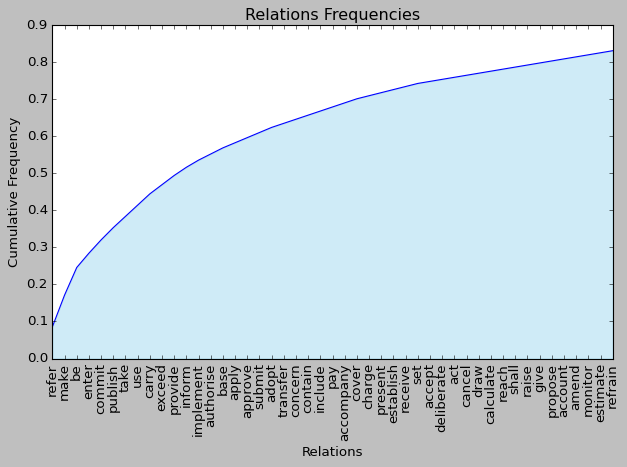

In [98]:
#barplot
plt.style.use('classic')
fig, ax = plt.subplots()


ax.plot(relations_freq[relations_freq['Frequency'] > 1]['Relation'], relations_freq[relations_freq['Frequency'] > 1]['Relative Cumulative Frequency'])

ax.fill_between(
    relations_freq[relations_freq['Frequency'] > 1]['Relation'], 
    relations_freq[relations_freq['Frequency'] > 1]['Relative Cumulative Frequency'], 
    color='skyblue', alpha=0.4
)


# ax.invert_yaxis()
ax.set_ylabel('Cumulative Frequency')
ax.set_xlabel('Relations')
ax.set_title('Relations Frequencies')

plt.xticks(rotation=90)
plt.tight_layout()
# ax.tick_params(axis='y', labelsize=8)

plt.show()

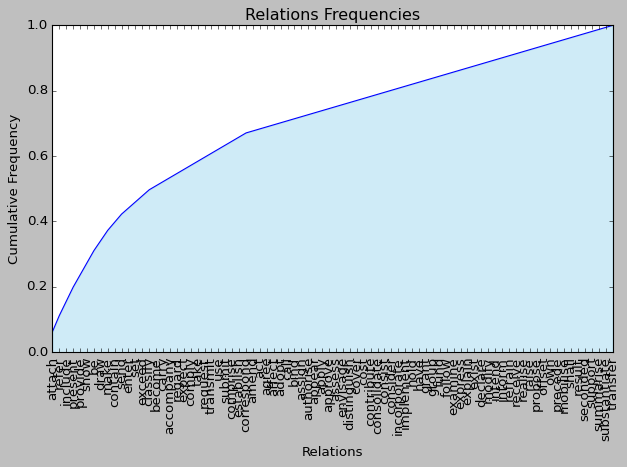

In [73]:
#barplot
plt.style.use('classic')
fig, ax = plt.subplots()


ax.plot(relations_freq['Relation'], relations_freq['Relative Cumulative Frequency'])

ax.fill_between(
    relations_freq['Relation'], 
    relations_freq['Relative Cumulative Frequency'], 
    color='skyblue', alpha=0.4
)


# ax.invert_yaxis()
ax.set_ylabel('Cumulative Frequency')
ax.set_xlabel('Relations')
ax.set_title('Relations Frequencies')

plt.xticks(rotation=90)
plt.tight_layout()
# ax.tick_params(axis='y', labelsize=8)

plt.show()

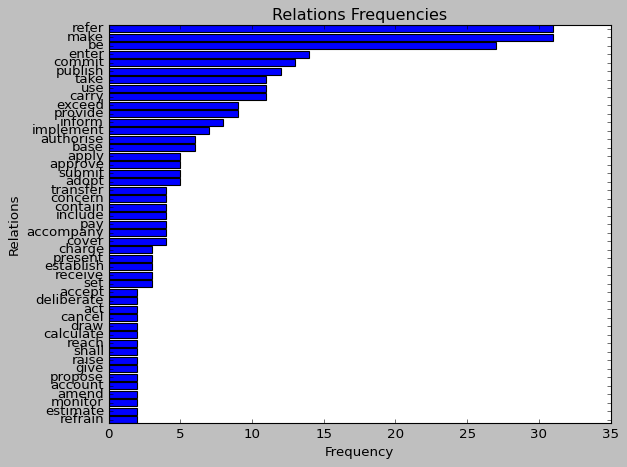

In [99]:
#barplot
plt.style.use('classic')
fig, ax = plt.subplots()


ax.barh(relations_freq[relations_freq['Frequency'] > 1]['Relation'], relations_freq[relations_freq['Frequency'] > 1]['Frequency'])
ax.invert_yaxis()
ax.set_ylabel('Relations')
ax.set_xlabel('Frequency')
ax.set_title('Relations Frequencies')

plt.tight_layout()
# ax.tick_params(axis='y', labelsize=8)

plt.show()

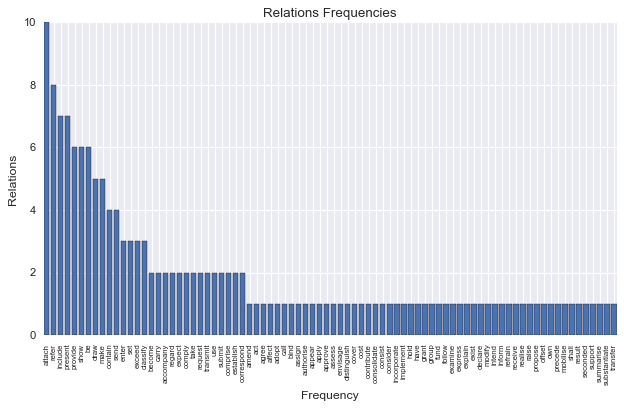

In [65]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()


ax.bar(relations_freq['Relation'], relations_freq['Frequency'])
ax.set_ylabel('Relations')
ax.set_xlabel('Frequency')
ax.set_title('Relations Frequencies')


plt.xticks(rotation=90)
plt.tight_layout()
ax.tick_params(axis='x', labelsize=7)

plt.show()

In [100]:
relations_freq['Frequency'].unique()

array([31, 27, 14, 13, 12, 11,  9,  8,  7,  6,  5,  4,  3,  2,  1])

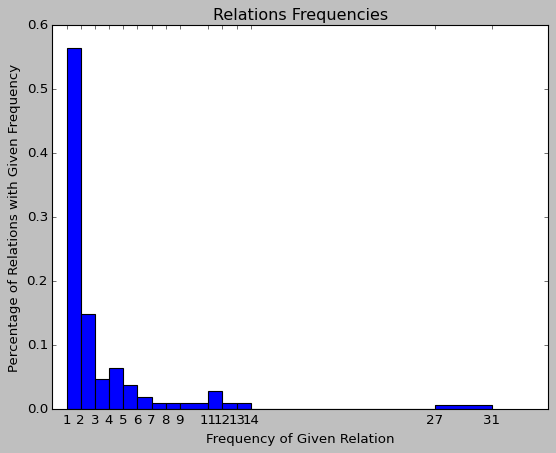

In [101]:
#histogram
plt.style.use('classic')
fig, ax = plt.subplots()

bins = np.sort(relations_freq['Frequency'].unique())

ax.hist(relations_freq['Frequency'], density=True, bins=bins)

ax.set_xticks(bins)
ax.set_xticklabels(bins ,ha='center')

ax.set_ylabel('Percentage of Relations with Given Frequency')
ax.set_xlabel('Frequency of Given Relation')
ax.set_title('Relations Frequencies')



plt.show()

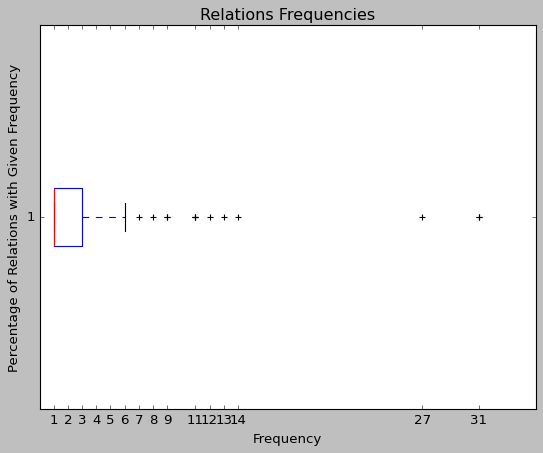

In [102]:
#boxplot

plt.style.use('classic')
fig, ax = plt.subplots()


ax.boxplot(relations_freq['Frequency'], vert=False)
ax.set_xticks(bins)
ax.set_xticklabels(bins ,ha='center')
ax.set_ylabel('Percentage of Relations with Given Frequency')
ax.set_xlabel('Frequency')
ax.set_title('Relations Frequencies')



plt.show()

# Triplets Dataframe for Neo4j 

In [38]:
triplets_df_nostop.head()

,Title,Articles,Content,coreference_list_ready,Cleaned_Content_new,triplets_list,empty_list,many_triplets,head,relation,tail,is_stopword,head_nostop,head_has_noun,noun_chunks
0,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter,[\nThis Regulation lays down the rules for the...,this regulation lays down the rules for the es...,this regulation lays down the rules for the es...,"[this regulation, lay, the rules for the estab...",False,False,this regulation,lay,the rules for the establishment and the implem...,False,regulation,True,[regulation]
1,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,applicant means a natural person or an entity ...,applicant means a natural person or an entity ...,"[applicant, mean, a natural person or an entit...",False,True,applicant,mean,a natural person or an entity with or without ...,False,applicant,True,[applicant]
2,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,application document means a tender a request ...,application document means a tender a request ...,"[application document, mean, a tender a reques...",False,False,application document,mean,a tender a request to participate a grant appl...,False,application document,True,[application document]
3,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,award procedure means a procurement procedure ...,award procedure means a procurement procedure ...,"[award procedure, mean, a procurement procedur...",False,False,award procedure,mean,a procurement procedure a grant award procedur...,False,award procedure,True,[award procedure]
4,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions,[ ‘applicant’ means a natural person or an ent...,basic act means a legal act other than a recom...,basic act means a legal act other than a recom...,"[basic act, mean, a legal act other than a rec...",False,True,basic act,mean,a legal act other than a recommendation or an ...,False,basic act,True,[basic act]


In [39]:
triplets_df_nostop.columns

Index(['Title', 'Articles', 'Content', 'coreference_list_ready',
       'Cleaned_Content_new', 'triplets_list', 'empty_list', 'many_triplets',
       'head', 'relation', 'tail', 'is_stopword', 'head_nostop',
       'head_has_noun', 'noun_chunks'],
      dtype='object')

In [40]:
triplets_neo4j = triplets_df_nostop[['head_nostop', 'relation', 'tail', 'Title', 'Articles']]
triplets_neo4j.head()

,head_nostop,relation,tail,Title,Articles
0,regulation,lay,the rules for the establishment and the implem...,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 1 Subject matter
1,applicant,mean,a natural person or an entity with or without ...,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions
2,application document,mean,a tender a request to participate a grant appl...,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions
3,award procedure,mean,a procurement procedure a grant award procedur...,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions
4,basic act,mean,a legal act other than a recommendation or an ...,"TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENE...",Article 2 Definitions


In [47]:
triplets_neo4j["Title"].unique()

array(['TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES ',
       'TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ',
       'TITLE III \nESTABLISHMENT AND STRUCTURE OF THE BUDGET ',
       'TITLE IV \nBUDGET IMPLEMENTATION ', 'TITLE V \nCOMMON RULES ',
       'TITLE VI \nINDIRECT MANAGEMENT ',
       'TITLE VII \nPROCUREMENT AND CONCESSIONS ', 'TITLE VIII \nGRANTS ',
       'TITLE IX \nPRIZES ',
       'TITLE X \nFINANCIAL INSTRUMENTS, BUDGETARY GUARANTEES AND FINANCIAL ASSISTANCE ',
       'TITLE XI \nCONTRIBUTIONS TO EUROPEAN POLITICAL PARTIES ',
       'TITLE XII \nOTHER BUDGET IMPLEMENTATION INSTRUMENTS ',
       'TITLE XIII \nANNUAL ACCOUNTS AND OTHER FINANCIAL REPORTING ',
       'TITLE XIV \nEXTERNAL AUDIT AND DISCHARGE ',
       'TITLE XV \nADMINISTRATIVE APPROPRIATIONS ',
       'TITLE XVI \nINFORMATION REQUESTS AND DELEGATED ACTS '],
      dtype=object)

In [51]:
triplets_neo4j[triplets_neo4j["Title"]=='TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES ']["tail"].unique()

array(['the rules for the establishment and the implementation of the general budget of the european union and of the european atomic energy community (the budget) and the presentation and auditing of the european union and of the european atomic energy community accounts',
       'a natural person or an entity with or without legal personality who has submitted an application in a grant award procedure or in a contest for prizes',
       'a tender a request to participate a grant application or an application in a contest for prizes',
       'a procurement procedure a grant award procedure a contest for prizes or a procedure for the selection of experts or persons or entities implementing the budget pursuant to point of the first subparagraph of article 62(1',
       'a legal act other than a recommendation or an opinion which provides a legal basis for an action and for the implementation of the corresponding expenditure entered in the budget or of the budgetary guarantee or financia

In [52]:
triplets_neo4j[triplets_neo4j["Title"]=='TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ']["tail"].unique()



array(['sound financial management and transparency in accordance with the principles of unity budgetary accuracy annuality equilibrium unit of account universality specification',
       'in this regulation',
       'all revenue and expenditure considered necessary for the union',
       'the revenue and expenditure of the european atomic energy community where to the budget',
       'differentiated appropriations which consist of commitment appropriations and payment appropriations and',
       'of: appropriations provided in the budget including by amending budgets appropriations carried over from preceding financial years appropriations made available again in accordance with article 15 appropriations arising from prefinancing payments which have been repaid in accordance with point of article 12(4) appropriations provided following the receipt of revenue assigned during the financial year or carried over from preceding financial years',
       'the total cost of the legal commitme

In [60]:
triplets_neo4j[triplets_neo4j["Title"]=='TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ']["head_nostop"].unique()

array(['budget', 'common foreign security policy cfsp',
       'appropriation authorise financial year',
       'commitment appropriation', 'payment appropriation',
       'paragraph 2 3 article', 'appropriation', 'budgetary commitment',
       'revenue expenditure', 'expenditure',
       'interest generate prefinance payment budget',
       'appropriation enter budget', 'revenue financial year',
       'resource month january follow financial year available advance pursuant regulation eu euratom 6092014',
       'entry respect value add tax vat', 'commitment',
       'global budgetary commitment', 'payment',
       'expenditure european agricultural guarantee fund eagf',
       'payment order', 'follow expenditure',
       'routine administrative expenditure', 'basis expenditure',
       'appropriation end financial year enter carry decision take pursuant paragraph 3 follow financial year : commitment appropriation nondifferentiate appropriation preparatory stage commitment procedure 

In [73]:
remove_stopwords('any donation made to the union such as income from foundations subsidies gifts and bequests')


'donation union income foundation subsidy gift bequest'

In [76]:
get_noun_chuncks('any donation made to the union such as income from foundations subsidies gifts and bequests')

['any donation',
 'the union',
 'income',
 'foundations subsidies gifts',
 'bequests']

In [75]:
get_noun_chuncks(remove_stopwords('any donation made to the union such as income from foundations subsidies gifts and bequests'))

['donation union income foundation subsidy gift bequest']

In [221]:
triplets_neo4j['Title'].unique()

array(['TITLE I \nSUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES ',
       'TITLE II \nBUDGET AND BUDGETARY PRINCIPLES ',
       'TITLE III \nESTABLISHMENT AND STRUCTURE OF THE BUDGET ',
       'TITLE IV \nBUDGET IMPLEMENTATION ', 'TITLE V \nCOMMON RULES ',
       'TITLE VI \nINDIRECT MANAGEMENT ',
       'TITLE VII \nPROCUREMENT AND CONCESSIONS ', 'TITLE VIII \nGRANTS ',
       'TITLE IX \nPRIZES ',
       'TITLE X \nFINANCIAL INSTRUMENTS, BUDGETARY GUARANTEES AND FINANCIAL ASSISTANCE ',
       'TITLE XI \nCONTRIBUTIONS TO EUROPEAN POLITICAL PARTIES ',
       'TITLE XII \nOTHER BUDGET IMPLEMENTATION INSTRUMENTS ',
       'TITLE XIII \nANNUAL ACCOUNTS AND OTHER FINANCIAL REPORTING ',
       'TITLE XIV \nEXTERNAL AUDIT AND DISCHARGE ',
       'TITLE XV \nADMINISTRATIVE APPROPRIATIONS ',
       'TITLE XVI \nINFORMATION REQUESTS AND DELEGATED ACTS '],
      dtype=object)

In [222]:
triplets_neo4j['Title'] = triplets_neo4j['Title'].apply(lambda x: re.sub(pattern, '', x).strip())

C:\Users\Student\AppData\Local\Temp\ipykernel_8772\1421977905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triplets_neo4j['Title'] = triplets_neo4j['Title'].apply(lambda x: re.sub(pattern, '', x).strip())


In [223]:
triplets_neo4j['Title'].unique()

array(['TITLE I SUBJECT MATTER, DEFINITIONS AND GENERAL PRINCIPLES',
       'TITLE II BUDGET AND BUDGETARY PRINCIPLES',
       'TITLE III ESTABLISHMENT AND STRUCTURE OF THE BUDGET',
       'TITLE IV BUDGET IMPLEMENTATION', 'TITLE V COMMON RULES',
       'TITLE VI INDIRECT MANAGEMENT',
       'TITLE VII PROCUREMENT AND CONCESSIONS', 'TITLE VIII GRANTS',
       'TITLE IX PRIZES',
       'TITLE X FINANCIAL INSTRUMENTS, BUDGETARY GUARANTEES AND FINANCIAL ASSISTANCE',
       'TITLE XI CONTRIBUTIONS TO EUROPEAN POLITICAL PARTIES',
       'TITLE XII OTHER BUDGET IMPLEMENTATION INSTRUMENTS',
       'TITLE XIII ANNUAL ACCOUNTS AND OTHER FINANCIAL REPORTING',
       'TITLE XIV EXTERNAL AUDIT AND DISCHARGE',
       'TITLE XV ADMINISTRATIVE APPROPRIATIONS',
       'TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS'], dtype=object)

In [224]:
triplets_neo4j.head()

,head_nostop,relation,tail,Title,Articles
0,regulation,lay,the rules for the establishment and the implem...,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 1 Subject matter
1,applicant,mean,a natural person or an entity with or without ...,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions
2,application document,mean,a tender a request to participate a grant appl...,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions
3,award procedure,mean,a procurement procedure a grant award procedur...,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions
4,basic act,mean,a legal act other than a recommendation or an ...,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions


In [225]:
triplets_neo4j.columns

Index(['head_nostop', 'relation', 'tail', 'Title', 'Articles'], dtype='object')

In [231]:
triplets_neo4j = triplets_neo4j.rename(columns={'head_nostop': 'head', 'Title': 'title', 'Articles': 'article',})
triplets_neo4j.reset_index(drop=True)

,title,relation,tail,title,article
0,regulation,lay,the rules for the establishment and the implem...,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 1 Subject matter
1,applicant,mean,a natural person or an entity with or without ...,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions
2,application document,mean,a tender a request to participate a grant appl...,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions
3,award procedure,mean,a procurement procedure a grant award procedur...,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions
4,basic act,mean,a legal act other than a recommendation or an ...,"TITLE I SUBJECT MATTER, DEFINITIONS AND GENERA...",Article 2 Definitions
...,...,...,...,...,...
3628,17 18 22 23 article 272(26)(d article 272(27)(...,article,212 and 213 article 214(2),TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,Article 282 Entry into force and application
3629,17 18 22 23 article 272(26)(d article 272(27)(...,article,218 219 and 220,TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,Article 282 Entry into force and application
3630,17 18 22 23 article 272(26)(d article 272(27)(...,apply,the information on the annual average of fullt...,TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,Article 282 Entry into force and application
3631,information estimate assign revenue carry prec...,provide,for the first time together with the draft bud...,TITLE XVI INFORMATION REQUESTS AND DELEGATED ACTS,Article 282 Entry into force and application


In [236]:
triplets_neo4j.to_csv('triplets_neo4j.csv', index=False)  